In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from glob import glob

import matplotlib as mpl
import matplotlib.pyplot as plt
from fastcore.xtras import load_pickle

import matplotx
import numpy as np
import pandas as pd

from scipy.stats import sem

from gptchem.plotsettings import *

%matplotlib inline


In [3]:
all_res = glob("out/**/*.pkl")

In [4]:
compiled_res = []
compiled_drfp_linear = []
compiled_drfp_rbf = []
compiled_ohe_tanimoto = []
compiled_rxnfp_linear = []
compiled_rxnfp_rbf = []

for res in all_res:
    loaded = load_pickle(res)
    repre = loaded["representation"]
    num_points = loaded["num_train_points"]

    metrics = {
        "representation": loaded["representation"],
        "num_train_points": loaded["num_train_points"],
        "mae": loaded["mean_absolute_error"],
        "max_error": loaded["max_error"],
        "mse": loaded["mean_squared_error"],
    }

    compiled_res.append(metrics)

    drfp_rbf_metrics = {
        "num_train_points": loaded["num_train_points"],
        "mae": loaded["baseline"]["metrics"]["drfp-rbf"]["mean_absolute_error"],
        "max_error": loaded["baseline"]["metrics"]["drfp-rbf"]["max_error"],
        "mse": loaded["baseline"]["metrics"]["drfp-rbf"]["mean_squared_error"],
    }

    compiled_drfp_rbf.append(drfp_rbf_metrics)

    ohe_tanimoto_metrics = {
        "num_train_points": loaded["num_train_points"],
        "mae": loaded["baseline"]["metrics"]["ohe-tanimoto"]["mean_absolute_error"],
        "max_error": loaded["baseline"]["metrics"]["ohe-tanimoto"]["max_error"],
        "mse": loaded["baseline"]["metrics"]["ohe-tanimoto"]["mean_squared_error"],
    }

    compiled_ohe_tanimoto.append(ohe_tanimoto_metrics)

    rxnfp_linear_metrics = {
        "num_train_points": loaded["num_train_points"],
        "mae": loaded["baseline"]["metrics"]["rxnfp-linear"]["mean_absolute_error"],
        "max_error": loaded["baseline"]["metrics"]["rxnfp-linear"]["max_error"],
        "mse": loaded["baseline"]["metrics"]["rxnfp-linear"]["mean_squared_error"],
    }

    compiled_rxnfp_linear.append(rxnfp_linear_metrics)

    rxnfp_rbf_metrics = {
        "num_train_points": loaded["num_train_points"],
        "mae": loaded["baseline"]["metrics"]["rxnfp-rbf"]["mean_absolute_error"],
        "max_error": loaded["baseline"]["metrics"]["rxnfp-rbf"]["max_error"],
        "mse": loaded["baseline"]["metrics"]["rxnfp-rbf"]["mean_squared_error"],
    }

    compiled_rxnfp_rbf.append(rxnfp_rbf_metrics)

    drfp_linear_metrics = {
        "num_train_points": loaded["num_train_points"],
        "mae": loaded["baseline"]["metrics"]["drfp-linear"]["mean_absolute_error"],
        "max_error": loaded["baseline"]["metrics"]["drfp-linear"]["max_error"],
        "mse": loaded["baseline"]["metrics"]["drfp-linear"]["mean_squared_error"],
    }

    compiled_drfp_linear.append(drfp_linear_metrics)

In [5]:
compiled_res = pd.DataFrame(compiled_res)
compiled_drfp_linear = pd.DataFrame(compiled_drfp_linear)
compiled_drfp_rbf = pd.DataFrame(compiled_drfp_rbf)
compiled_ohe_tanimoto = pd.DataFrame(compiled_ohe_tanimoto)
compiled_rxnfp_linear = pd.DataFrame(compiled_rxnfp_linear)
compiled_rxnfp_rbf = pd.DataFrame(compiled_rxnfp_rbf)

In [6]:
compiled_drfp_rbf

,num_train_points,mae,max_error,mse
0,10,0.254320,0.518460,0.085183
1,100,0.173650,0.654809,0.049751
2,200,0.150851,0.477499,0.035805
3,10,0.249487,0.606126,0.083320
4,20,0.230985,0.545169,0.075770
...,...,...,...,...
244,100,0.182754,0.651632,0.053980
245,20,0.217642,0.594799,0.069545
246,50,0.182502,0.569832,0.049196
247,50,0.162210,0.476012,0.041240


In [7]:
compiled_grouped_res = compiled_res.groupby(["representation", "num_train_points"]).agg(
    ["mean", "std", sem]
)

/Users/kevinmaikjablonka/miniconda3/envs/gptchem/lib/python3.9/site-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/kevinmaikjablonka/miniconda3/envs/gptchem/lib/python3.9/site-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/kevinmaikjablonka/miniconda3/envs/gptchem/lib/python3.9/site-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


In [8]:
compiled_drfp_linear_grouped = compiled_drfp_linear.groupby(["num_train_points"]).agg(
    ["mean", "std", sem]
)

compiled_drfp_rbf_grouped = compiled_drfp_rbf.groupby(["num_train_points"]).agg(["mean", "std", sem])

compiled_ohe_tanimoto_grouped = compiled_ohe_tanimoto.groupby(["num_train_points"]).agg(
    ["mean", "std", sem]
)

compiled_rxnfp_linear_grouped = compiled_rxnfp_linear.groupby(["num_train_points"]).agg(
    ["mean", "std", sem]
)

compiled_rxnfp_rbf_grouped = compiled_rxnfp_rbf.groupby(["num_train_points"]).agg(["mean", "std", sem])

In [9]:
compiled_grouped_res

mae                     max_error       \
                                     mean       std       sem      mean  std   
representation num_train_points                                                
DreherDoyle    10                     NaN       NaN       NaN       NaN  NaN   
               200               0.288333  0.028577  0.011667       1.0  0.0   
SuzukiMiyaura  10                0.384222  0.049428       NaN       1.0  0.0   
               20                0.377083  0.061123  0.008822       1.0  0.0   
               50                0.328298  0.055534  0.008100       1.0  0.0   
               100               0.296596  0.064108       NaN       1.0  0.0   
               200               0.252400  0.053091  0.007508       1.0  0.0   

                                           mse                      
                                 sem      mean       std       sem  
representation num_train_points                                     
DreherDoyle    10                NaN       NaN       NaN       NaN  
               200               0.0  0.288333  0.028577  0.011667  
SuzukiMiyaura  10                NaN  0.384222  0.049428       NaN  
               20                0.0  0.377083  0.061123  0.008822  
               50                0.0  0.328298  0.055534  0.008100  
               100               NaN  0.296596  0.064108       NaN  
               200               0.0  0.252400  0.053091  0.007508

In [10]:
compiled_rxnfp_linear_grouped

mae                     max_error                      \
                      mean       std       sem      mean       std       sem   
num_train_points                                                               
10                0.238243  0.021082  0.002981  0.591920  0.082783  0.011707   
20                0.231774  0.022823  0.003294  0.567870  0.060934  0.008795   
50                0.204192  0.012856  0.001875  0.553276  0.059843  0.008729   
100               0.189825  0.015701  0.002266  0.555705  0.056613  0.008171   
200               0.184552  0.013297  0.001777  0.576614  0.063081  0.008429   

                       mse                      
                      mean       std       sem  
num_train_points                                
10                0.079158  0.012713  0.001798  
20                0.074529  0.011887  0.001716  
50                0.060921  0.007097  0.001035  
100               0.053584  0.006564  0.000947  
200               0.052412  0.006386  0.000853

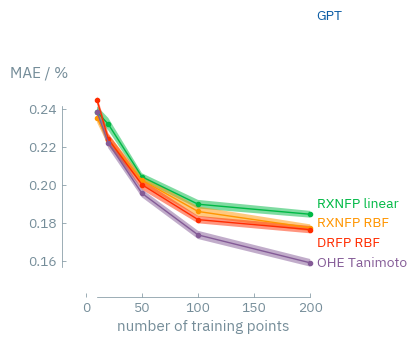

In [11]:
fig, ax = plt.subplots(1, 1)
ax.plot(
    compiled_grouped_res.loc["DreherDoyle", :].index,
    compiled_grouped_res.loc["DreherDoyle", :]["mae"]["mean"],
    label="GPT",
    marker="o",
)

ax.fill_between(
    compiled_grouped_res.loc["DreherDoyle", :].index,
    compiled_grouped_res.loc["DreherDoyle", :]["mae"]["mean"]
    - compiled_grouped_res.loc["DreherDoyle", :]["mae"]["sem"],
    compiled_grouped_res.loc["DreherDoyle", :]["mae"]["mean"]
    + compiled_grouped_res.loc["DreherDoyle", :]["mae"]["sem"],
    alpha=0.5,
)

ax.plot(
    compiled_rxnfp_linear_grouped.index,
    compiled_rxnfp_linear_grouped["mae"]["mean"],
    label="RXNFP linear",
    marker="o",
)

ax.fill_between(
    compiled_rxnfp_linear_grouped.index,
    compiled_rxnfp_linear_grouped["mae"]["mean"] - compiled_rxnfp_linear_grouped["mae"]["sem"],
    compiled_rxnfp_linear_grouped["mae"]["mean"] + compiled_rxnfp_linear_grouped["mae"]["sem"],
    alpha=0.5,
)

ax.plot(
    compiled_rxnfp_rbf_grouped.index,
    compiled_rxnfp_rbf_grouped["mae"]["mean"],
    label="RXNFP RBF",
    marker="o",
)

ax.fill_between(
    compiled_rxnfp_rbf_grouped.index,
    compiled_rxnfp_rbf_grouped["mae"]["mean"] - compiled_rxnfp_rbf_grouped["mae"]["sem"],
    compiled_rxnfp_rbf_grouped["mae"]["mean"] + compiled_rxnfp_rbf_grouped["mae"]["sem"],
    alpha=0.5,
)

ax.plot(
    compiled_drfp_linear_grouped.index,
    compiled_drfp_linear_grouped["mae"]["mean"],
    label="DRFP RBF",
    marker="o",
)

ax.fill_between(
    compiled_drfp_linear_grouped.index,
    compiled_drfp_linear_grouped["mae"]["mean"] - compiled_drfp_linear_grouped["mae"]["sem"],
    compiled_drfp_linear_grouped["mae"]["mean"] + compiled_drfp_linear_grouped["mae"]["sem"],
    alpha=0.5,
)

ax.plot(
    compiled_ohe_tanimoto_grouped.index,
    compiled_ohe_tanimoto_grouped["mae"]["mean"],
    label="OHE Tanimoto",
    marker="o",
)

ax.fill_between(
    compiled_ohe_tanimoto_grouped.index,
    compiled_ohe_tanimoto_grouped["mae"]["mean"] - compiled_ohe_tanimoto_grouped["mae"]["sem"],
    compiled_ohe_tanimoto_grouped["mae"]["mean"] + compiled_ohe_tanimoto_grouped["mae"]["sem"],
    alpha=0.5,
)

matplotx.line_labels()

ax.set_xlabel("number of training points", labelpad=4)
ylabel_top("MAE / %", y_pad=-0.05)
# ax.set_xscale('log')

range_frame(
    ax, 
     compiled_ohe_tanimoto_grouped.index,
     np.stack(
        [
             compiled_rxnfp_linear_grouped["mae"]["mean"] + compiled_rxnfp_linear_grouped["mae"]["sem"],
                 compiled_ohe_tanimoto_grouped["mae"]["mean"] - compiled_ohe_tanimoto_grouped["mae"]["sem"]
        ]
     ).flatten()
)

fig.savefig("suzuki_regression_res.pdf", bbox_inches="tight")